In [4]:
import pytest
import pandas as pd
import numpy as np
import xgboost as xgb
from tboost.models import XGBTransferLearner
from sklearn.exceptions import NotFittedError

data = {
    "f1": [100.0, 1.0, 32.24, 30.34, 21.67, 18.13, 39.8, 1.85, 27.53, 11.23],
    "f2": [1.0, 15.98, 17.78, 18.86, 36.75, 12.79, 100.0, 76.07, 53.54, 47.09],
    "f3": [82.1, 1.0, 72.77, 40.7, 14.61, 78.51, 97.11, 100.0, 61.48, 73.41],
    "y": [0, 0, 1, 0, 0, 1, 0, 0, 1, 1],
}

df = pd.DataFrame(data)
X = df[["f1", "f2", "f3"]]
y = df["y"]

model = xgb.XGBClassifier(
    max_depth = 2,
    reg_lambda = 0,
    num_leaves=4,
    n_estimators=4)

with pytest.raises(NotFittedError):
    XGBTransferLearner(model)

model.fit(X,y)

probas = model.predict_proba(X)

tbooster = XGBTransferLearner(model)
tbooster.fit(X,y)

tboost_probas = tbooster.predict_proba(X)

np.testing.assert_array_almost_equal(probas, tboost_probas)

[21:19:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:19:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [5]:
import tboost
from tboost.dataset import load_data
from tboost.models import XGBTransferLearner

import xgboost as xgb

# Get 
X, y1, y2 = load_data(return_X_y=True)

xgb_model = xgb.XGBClassifier(
    max_depth = 2,
    reg_lambda = 0,
    num_leaves=4,
    n_estimators=100,
)

xgb_model.fit(X,y1)

t_xgb_model = XGBTransferLearner(xgb_model)
t_xgb_model.fit(X,y2)
t_xgb_model.predict_proba(X)



/Users/sandro/.miniconda/installation/envs/tboost_dev/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:50:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:50:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[0.70023316, 0.29976684],
       [0.70499377, 0.29500623],
       [0.91163901, 0.08836099],
       ...,
       [0.60772859, 0.39227141],
       [0.76717276, 0.23282724],
       [0.80914091, 0.19085909]])

In [7]:
import tboost
from tboost.dataset import load_data

import xgboost as xgb

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
X, y1, y2 = load_data(return_X_y=True)

In [9]:

from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train_1, y_test_1 = train_test_split(X,y1, test_size=0.33, random_state=42)

y_train_2 = y2.loc[X_train.index]
y_test_2= y2.loc[X_test.index]

502
[21:35:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { min_child_samples, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81073	validation_0-logloss:0.60129	validation_1-auc:0.80522	validation_1-logloss:0.60215


/Users/sandro/.miniconda/installation/envs/tboost_dev/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-auc:0.90026	validation_0-logloss:0.37932	validation_1-auc:0.88549	validation_1-logloss:0.39476
[60]	validation_0-auc:0.90642	validation_0-logloss:0.36587	validation_1-auc:0.88710	validation_1-logloss:0.39034
[66]	validation_0-auc:0.90790	validation_0-logloss:0.36331	validation_1-auc:0.88728	validation_1-logloss:0.39014
CPU times: user 1.63 s, sys: 47.8 ms, total: 1.68 s
Wall time: 568 ms


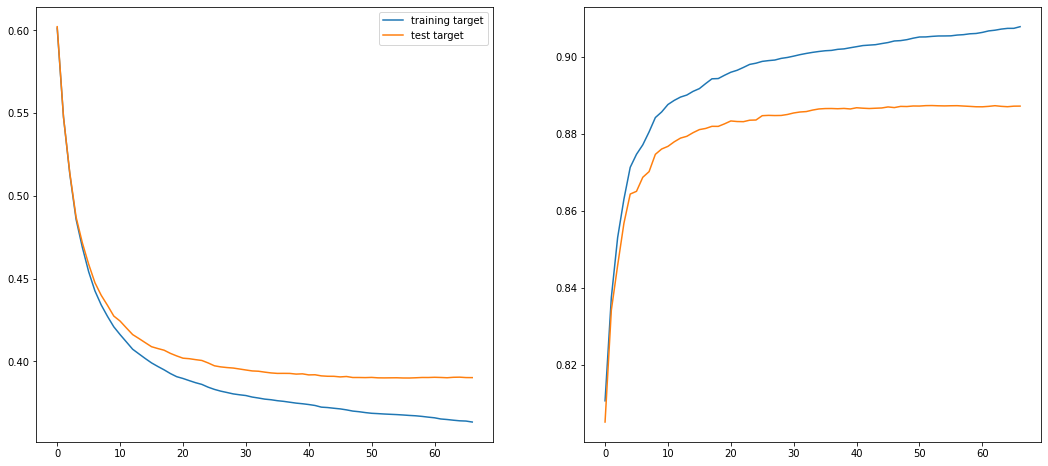

In [11]:
%%time

min_frac =int(0.05*X_train.shape[0])
print(min_frac)

# model = lgb.LGBMClassifier(
#     num_leaves=4,
#     n_estimators=10,
#     min_child_samples=min_frac
# )

xgb_model = xgb.XGBClassifier(
    max_depth = 2,
    reg_lambda = 0,
    num_leaves=4,
    n_estimators=130,
    min_child_samples=min_frac
)

eval_set = [(X_train,y_train_1),(X_test, y_test_1)]

xgb_model.fit(
    X_train,
    y_train_1,
    eval_metric=["auc","logloss"], 
#     eval_names = ['validation_0','validation_1'],
    eval_set=eval_set, 
    verbose=30, # after how many training sets you want the printout on the console
    early_stopping_rounds=10
)

fig, ax = plt.subplots(1,2,figsize=(18,8))


ax[0].plot(xgb_model.evals_result_['validation_0']['logloss'], label = "training target")
ax[0].plot(xgb_model.evals_result_['validation_1']['logloss'], label = "test target")

ax[1].plot(xgb_model.evals_result_['validation_0']['auc'])
ax[1].plot(xgb_model.evals_result_['validation_1']['auc'])
ax[0].legend()



In [12]:
from tboost.utils.boost import TBoost
import numpy as np

In [ ]:
leaves_train = xgb_model.apply(X_train)
leaves_test = xgb_model.apply(X_test)

In [13]:
from tboost.models.xgb import XGBTransferLearner

In [14]:
xgb_model.objective

'binary:logistic'

In [15]:
XGBTransferLearner(xgb.XGBRegressor())

UnsupportedModelError: XGBTransferLearner does not support the model XGBRegressor

In [16]:
xgb_model.base_score

In [17]:
xgb_tboost = XGBTransferLearner(xgb_model)

In [18]:
xgb_tboost.fit(X_train, y_train_2)

In [19]:
probs = xgb_tboost.predict_proba(X_train)

In [ ]:
probs[:,1]

In [ ]:
np.hstack([1-probs.reshape(-1,1),probs.reshape(-1,1)])

In [ ]:
xgb_tboost._fit()

In [ ]:
die

In [ ]:
tb = TBoost(model_params=xgb_model.get_params())

In [ ]:
tb._fit(X_train, y_train_2, leaves_train)

In [ ]:
tb._predict_proba?

In [ ]:
tb._predict_proba?

In [ ]:
xgb_proba = list()
tb_proba = list()
for ix_tree in range(1,leaves_train.shape[1]+1):
    xgb_proba.append(xgb_model.predict_proba(X_test, ntree_limit = ix_tree)[:,1])
    tb_proba.append(tb._predict_proba(leaves_test, tree_index = ix_tree))

In [ ]:
from sklearn.metrics import roc_auc_score, log_loss

In [ ]:
auc_xgb_tar_1 = [log_loss(y_test_1,xgb_prob) for xgb_prob in xgb_proba]
auc_xgb_tar_2 = [log_loss(y_test_2,xgb_prob) for xgb_prob in xgb_proba]
auc_tb_tar_2 = [log_loss(y_test_2,tb_prob) for tb_prob in tb_proba]

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))


ax.plot(auc_xgb_tar_1, label = "XGB y1")
ax.plot(auc_xgb_tar_2, label = "XGB y2")
ax.plot(auc_tb_tar_2, label = "Transfer Boost y2")

ax.set_xlabel("N trees")

ax.legend()

In [ ]:
len(tb_proba)

In [ ]:
tb.leaf_vals_map_

In [ ]:
from tboost.utils import recompute_leaves, compute_probability

In [ ]:
leaves_train = xgb_model.apply(X_train)
leaves_test = xgb_model.apply(X_test)

In [ ]:
transfered_leafs_train, leaves_map = recompute_leaves(leaves_train, X_train, y_train_2, model_params=xgb_model.get_params())

In [ ]:
transfered_leafs_train.shape

In [ ]:
leaves_train.shape

In [ ]:
leaves_train[:,0]

In [ ]:
leaves_map[0]

In [ ]:
compute_probability?

In [ ]:
bst.save_model("test.json")

In [ ]:
bst = xgb_model.get_booster() 

In [ ]:
bst.load_model?

In [ ]:
bst.save_model?